In [62]:
import numpy as np
import pandas as pd

In [63]:
df = pd.read_csv("./data.csv")

In [64]:
df.shape

(1000, 10)

In [65]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [66]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [67]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

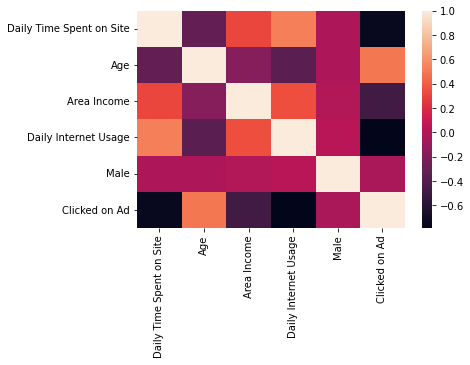

In [69]:
sns.heatmap(df.corr())
plt.show()

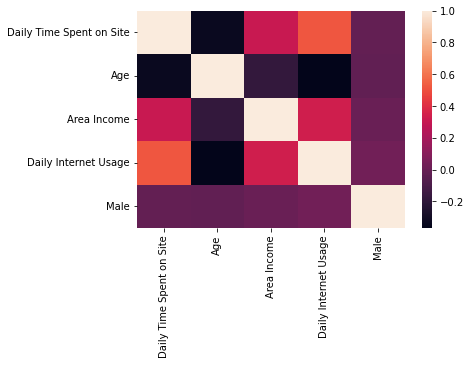

In [70]:
sns.heatmap(df.drop(['Clicked on Ad'], axis= 1).corr())
plt.show()

In [71]:
len(df['Ad Topic Line'].value_counts())

1000

<AxesSubplot:>

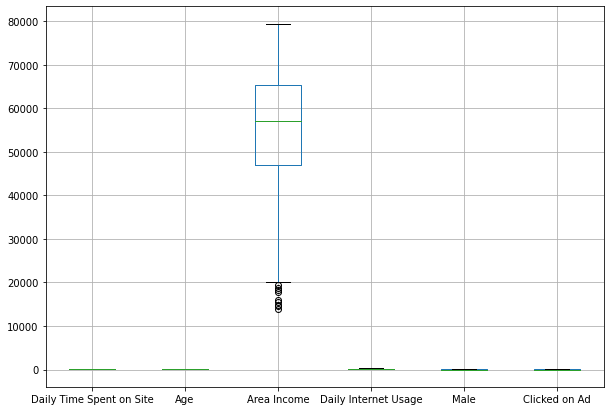

In [72]:
fig = plt.figure(figsize =(10, 7))

df.boxplot()
# plt.boxplot(df['Area Income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aac8f09670>,
 'caps': [<matplotlib.lines.Line2D at 0x1aac8f09c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aac8f093a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1aac8f151f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aac8f154c0>],
 'means': []}

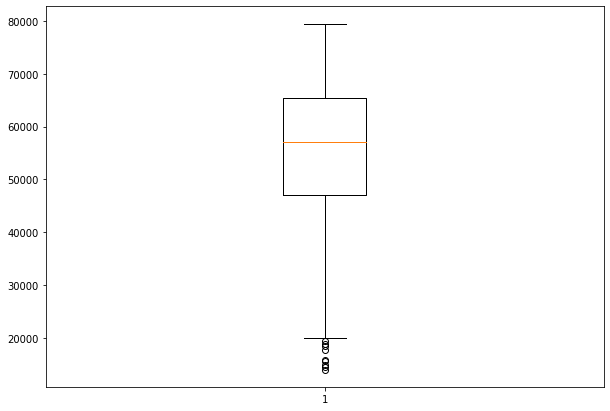

In [73]:
fig = plt.figure(figsize =(10, 7))

# df.boxplot()
plt.boxplot(df['Area Income'])

<AxesSubplot:>

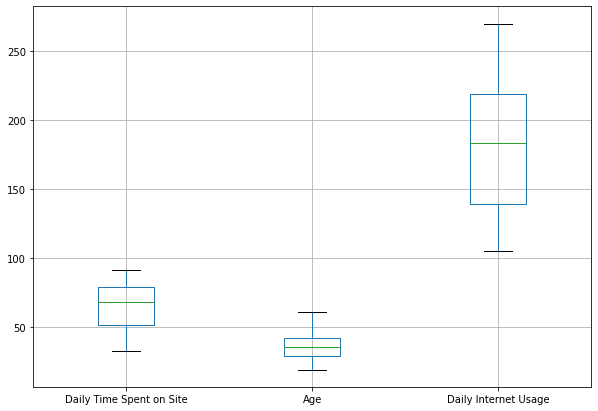

In [74]:
fig = plt.figure(figsize =(10, 7))

df.drop(['Area Income', 'Male', 'Clicked on Ad'], axis= 1).boxplot()

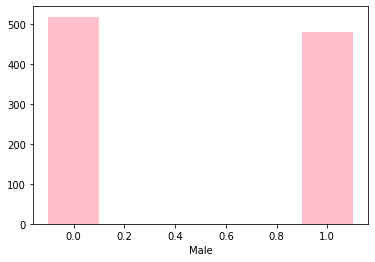

In [75]:
decd = dict(df['Male'].value_counts())
plt.bar([0, 1], decd.values(), color ='pink', width= 0.2) 

plt.xlabel(str('Male'))
plt.show()

In [15]:
book = []

for i in df['Ad Topic Line']:
    i = i.split(" ")
    for j in i:
        book.append(j)

print(len(book))

book = pd.DataFrame(np.array(book))

freq = dict(book[0].value_counts())

emptyColumns = []

for i in freq.keys():
    emptyColumns.append(pd.Series([0]*1000))

emptyDF = pd.DataFrame(emptyColumns)
emptyDF = emptyDF.transpose()
emptyDF.columns = freq.keys()

for i in range(df.shape[0]):
    colWords = df.iloc[i, 4].split(" ")

    for j in colWords:
        emptyDF.loc[i, j] += 1

emptyDF.to_csv("vectorized_ad_topic.csv")

newDF = pd.concat([df, emptyDF], axis= 1)

print(newDF.shape)
newDF

3219
(1000, 329)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Profit-focused,improvement,artificial,intelligence,functionalities,Persistent,static,Re-contextualized,process,matrices
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
emptyColumns = []

for i in range(6):
    emptyColumns.append(pd.Series([0]*1000))

emptyDF = pd.DataFrame(emptyColumns)
emptyDF = emptyDF.transpose()

for i in range(len(df['Timestamp'])):
    # print(i.split(' '))
    date, time = df.loc[i, ['Timestamp']][0].split(' ')
    lst = []
    for k in date.split('-'):
        lst.append(k)
    for k in time.split(':'):
        lst.append(k)
    # print(lst)
    for j in range(len(lst)):
        emptyDF.loc[i, j] = int(lst[j])
    # print(emptyDF.loc[i, :])

print(emptyDF)

emptyDF.columns = ['year', 'month', 'date', 'hours', 'min', 'sec']

        0  1   2   3   4   5
0    2016  3  27   0  53  11
1    2016  4   4   1  39   2
2    2016  3  13  20  35  42
3    2016  1  10   2  31  19
4    2016  6   3   3  36  18
..    ... ..  ..  ..  ..  ..
995  2016  2  11  21  49   0
996  2016  4  22   2   7   1
997  2016  2   1  17  24  57
998  2016  3  24   2  35  54
999  2016  6   3  21  43  21

[1000 rows x 6 columns]


In [17]:
newDF = pd.concat([newDF, emptyDF], axis= 1)

print(newDF.shape)
newDF

(1000, 335)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,static,Re-contextualized,process,matrices,year,month,date,hours,min,sec
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,0,0,0,2016,3,27,0,53,11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,2016,4,4,1,39,2
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,2016,3,13,20,35,42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,2016,1,10,2,31,19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,2016,6,3,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,...,0,0,0,0,2016,2,11,21,49,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,...,0,0,0,0,2016,4,22,2,7,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,...,0,0,0,0,2016,2,1,17,24,57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,...,0,0,0,0,2016,3,24,2,35,54


In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df = newDF.copy()
df.drop(['Ad Topic Line', 'Timestamp', 'Male'], axis= 1, inplace= True)

In [21]:
lbl = LabelEncoder()

df['City'] = lbl.fit_transform(df['City'])
df['City']

0      961
1      903
2      111
3      939
4      805
      ... 
995    126
996    488
997    798
998    935
999    744
Name: City, Length: 1000, dtype: int32

In [22]:
df['Country'] = lbl.fit_transform(df['Country'])
df['Country']

0      215
1      147
2      184
3      103
4       96
      ... 
995    116
996     26
997    140
998     85
999     28
Name: Country, Length: 1000, dtype: int32

In [23]:
df.shape

(1000, 332)

In [24]:
X = df.drop(['Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [25]:
(X.iloc[:, 0:7])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Country,solution
0,68.95,35,61833.90,256.09,961,215,0
1,80.23,31,68441.85,193.77,903,147,0
2,69.47,26,59785.94,236.50,111,184,0
3,74.15,29,54806.18,245.89,939,103,0
4,68.37,35,73889.99,225.58,805,96,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,126,116,0
996,51.30,45,67782.17,134.42,488,26,0
997,51.63,51,42415.72,120.37,798,140,1
998,55.55,19,41920.79,187.95,935,85,0


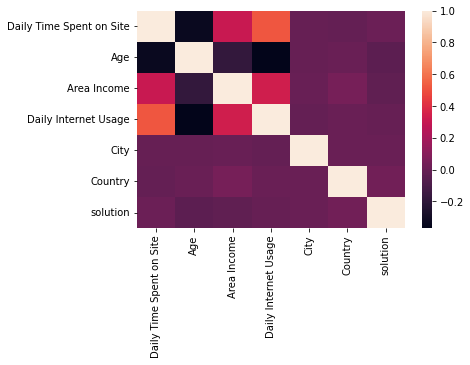

In [26]:
sn.heatmap(X.iloc[:, :7].corr())
plt.show()

In [27]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Country', 'Clicked on Ad', 'solution',
       'Interface', 'system',
       ...
       'static', 'Re-contextualized', 'process', 'matrices', 'year', 'month',
       'date', 'hours', 'min', 'sec'],
      dtype='object', length=332)

In [28]:
from sklearn import linear_model, metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, stratify= y)

In [29]:
reg = linear_model.LogisticRegression(max_iter= 100000)
  
reg.fit(X_train, y_train)
 
y_pred = reg.predict(X_test)
  
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 93.7037037037037


In [30]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(linear_model.LogisticRegression(max_iter= 100000), X, y,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[1.   0.97 0.97 0.95 0.98 0.98 0.98 0.95 0.97 0.94]
Avg : 0.969


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
# tree.plot_tree(dtree, feature_names=X.columns)

Decision Tree model accuracy(in %): 92.5925925925926


In [32]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(DecisionTreeClassifier(), X, y, cv=20)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.98 0.98 0.86 0.96 0.9  0.9  0.94 0.96 0.96 0.96 0.94 0.96 0.96 0.96
 0.92 0.92 0.86 0.98 0.96 0.9 ]
Avg : 0.938
